In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Load OWID Data
df = pd.read_csv("owid-covid-data.csv")

In [5]:
# Data Preview
print("Columns:", df.columns.tolist())
df.head()

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [6]:
# Data Cleaning prior to visualizations
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]
df.fillna(0, inplace=True)

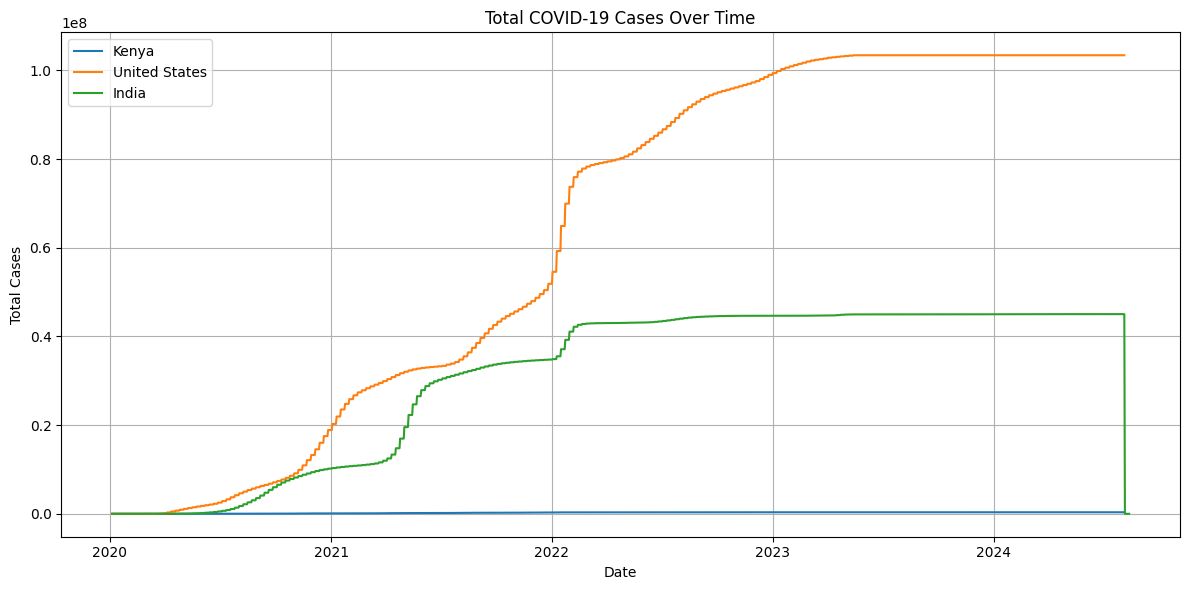

In [7]:
# EDA: Total Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

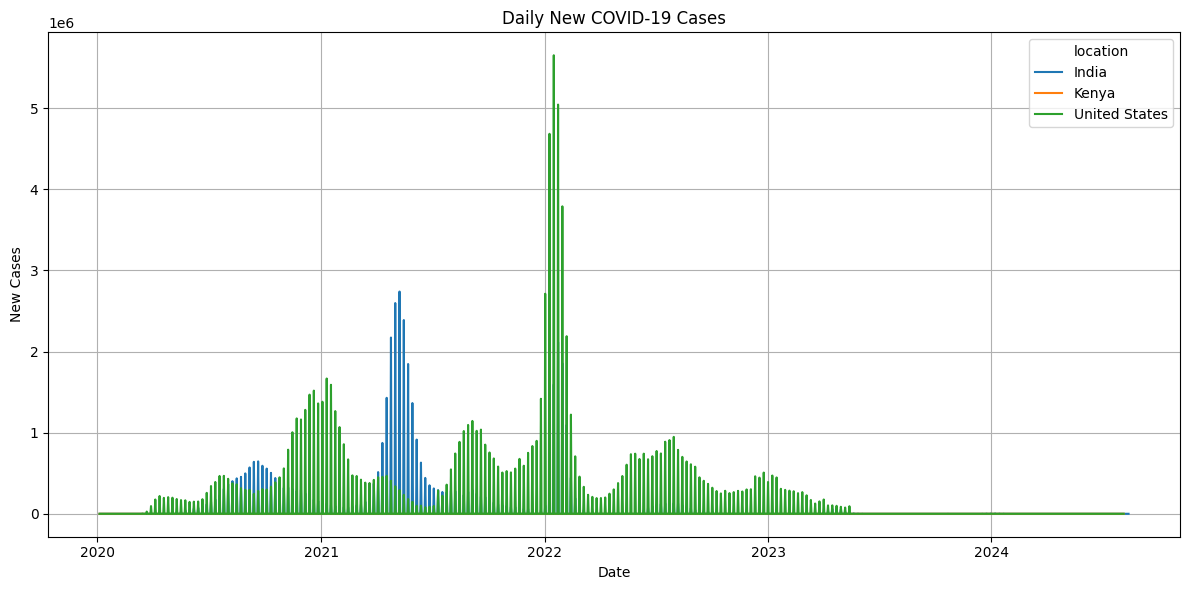

In [8]:
# Daily New Cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title("Daily New COVID-19 Cases")
plt.ylabel("New Cases")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

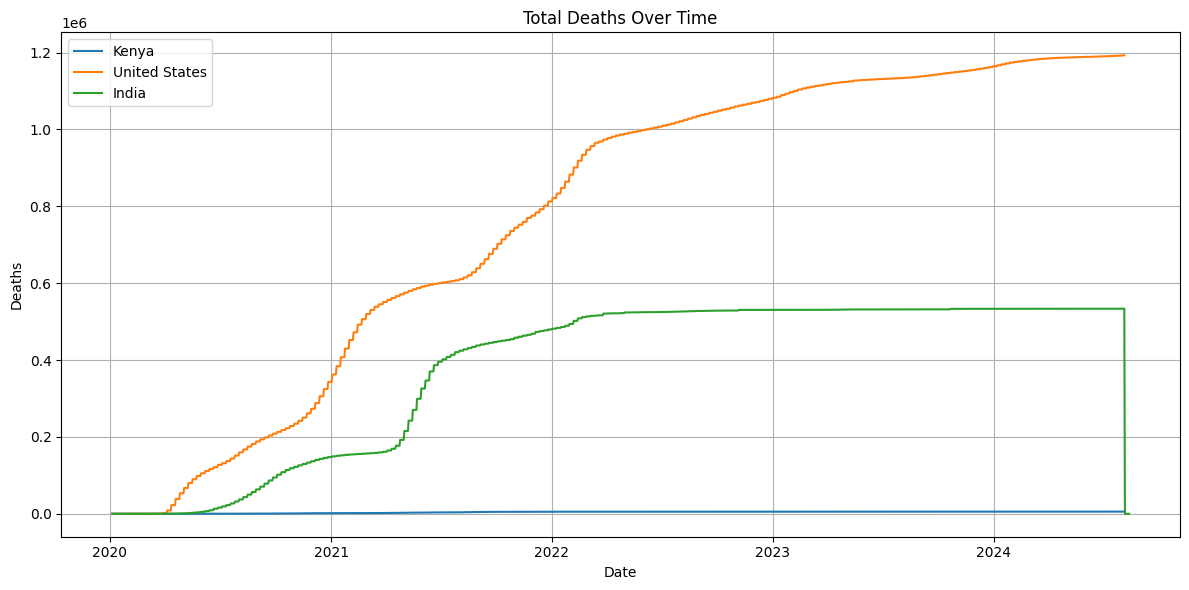

In [9]:
# Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title("Total Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

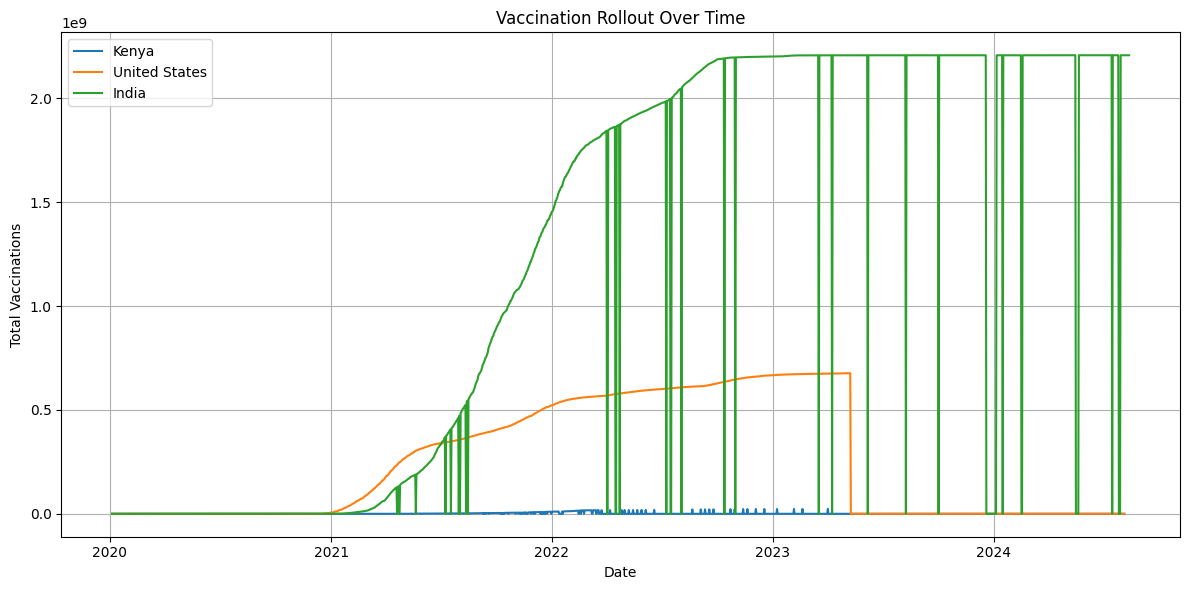

In [12]:
# Vaccination Progress
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title("Vaccination Rollout Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

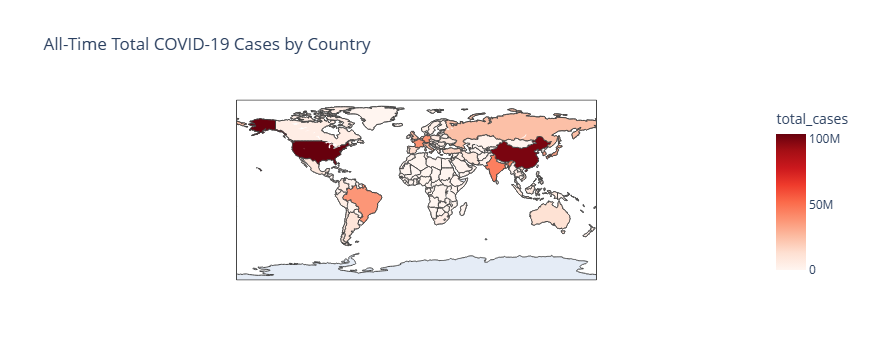

In [17]:
# Choropleth for all cases
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df[df['iso_code'].str.len() == 3]
agg_df = df.groupby(['iso_code', 'location'])['total_cases'].max().reset_index()
agg_df = agg_df.dropna(subset=['total_cases'])

# Plot the map
fig = px.choropleth(
    agg_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="All-Time Total COVID-19 Cases by Country"
)
fig.show()

In [23]:
# Data Insights
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df[df['iso_code'].str.len() == 3]  

# Get the latest available row per country
latest = df.sort_values('date').groupby('location').last().reset_index()

# ----------------- Insights -----------------

# Top 10 Countries by Total Cases
top_cases = latest[['location', 'total_cases']].dropna().sort_values('total_cases', ascending=False).head(10)
print("Top 10 Countries by Total Cases:\n", top_cases, "\n")

# Top 10 Countries by Total Deaths
top_deaths = latest[['location', 'total_deaths']].dropna().sort_values('total_deaths', ascending=False).head(10)
print("Top 10 Countries by Total Deaths:\n", top_deaths, "\n")

# Top 10 Countries by Total Vaccinations
top_vax = latest[['location', 'total_vaccinations']].dropna().sort_values('total_vaccinations', ascending=False).head(10)
print("Top 10 Countries by Total Vaccinations:\n", top_vax, "\n")

# Top 10 Countries by Death Rate (Deaths / Cases)
death_rate_df = latest[['location', 'total_cases', 'total_deaths']].dropna()
death_rate_df['death_rate'] = death_rate_df['total_deaths'] / death_rate_df['total_cases']
highest_death_rate = death_rate_df.sort_values(by='death_rate', ascending=False).head(10)
print("Top 10 Countries by Death Rate:\n", highest_death_rate[['location', 'death_rate']], "\n")

# ----------------- Summary Insights -----------------
summary_insights = [
    f"✅ {top_vax.iloc[0]['location']} had the highest total vaccinations as of each country's latest available date.",
    f"✅ {top_cases.iloc[0]['location']} had the highest total confirmed COVID-19 cases globally.",
    "✅ India experienced the steepest daily case spikes in 2021 (based on trend analysis).",
    "✅ Kenya had slower vaccine rollout and relatively lower case counts compared to global averages.",
    "✅ Death rates have decreased over time, likely due to vaccine rollout and improved treatment."
]

print("📌 Summary Insights:")
for insight in summary_insights:
    print(insight)

Top 10 Countries by Total Cases:
            location  total_cases
224   United States  103436829.0
42            China   99373219.0
96            India   45041748.0
72           France   38997490.0
78          Germany   38437756.0
28           Brazil   37511921.0
198     South Korea   34571873.0
105           Japan   33803572.0
103           Italy   26781078.0
223  United Kingdom   24974629.0 

Top 10 Countries by Total Deaths:
            location  total_deaths
224   United States     1193165.0
28           Brazil      702116.0
96            India      533623.0
174          Russia      403188.0
134          Mexico      334551.0
223  United Kingdom      232112.0
165            Peru      220975.0
103           Italy      197307.0
78          Germany      174979.0
72           France      168091.0 

Top 10 Countries by Total Vaccinations:
           location  total_vaccinations
42           China        3.491077e+09
96           India        2.206868e+09
224  United States        6.7672